In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD


In [ ]:
df = pd.read_csv("ratings_Beauty.csv")

In [ ]:
df.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [ ]:
df.shape

(849286, 4)

In [ ]:
df['ProductId'].value_counts().count()

76862

In [ ]:
popular_product1 = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
most_popular1 = popular_product1.sort_values('Rating' , ascending=False)

In [ ]:
most_popular1.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0000YUXI0,2143
B000ZMBSPE,2041
B00121UVU0,1838
B000FS05VG,1589
B000142FVW,1558
B001JKTTVQ,1468
B000TKH6G2,1379


<Axes: xlabel='ProductId'>

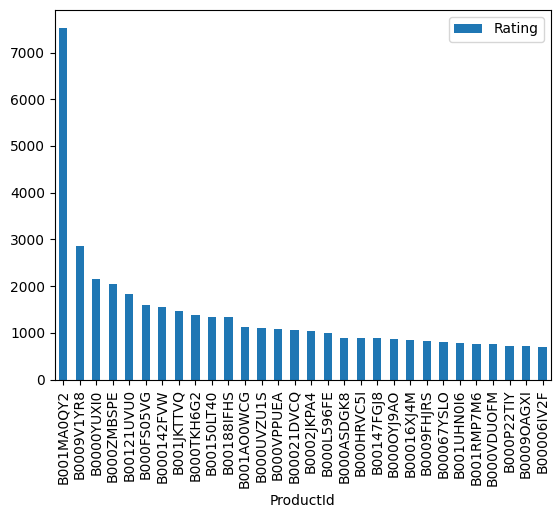

In [ ]:
most_popular1.head(30).plot(kind = "bar")

In [ ]:
data = df.head(10000)

In [ ]:
data['ProductId'].value_counts().count()

886

In [ ]:
data['UserId'].value_counts().count()

9697

In [ ]:
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ratings_utility_matrix.sum()

ProductId
0205616461      5
0558925278      8
0733001998      4
0737104473      1
0762451459      5
             ... 
B000052YPU     10
B000052YPV     76
B000052YPY     43
B000052YQ0    106
B000052YQ2    367
Length: 886, dtype: int64

In [ ]:
ratings_utility_matrix.shape


(9697, 886)

In [ ]:
X = ratings_utility_matrix.T
X

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
rows_with_ones = X[(X == 1).any(axis=1)]

print(rows_with_ones)

UserId      A00205921JHJK5X9LNP42  A024581134CV80ZBLIZTZ  \
ProductId                                                  
0737104473                      0                      0   
1304196070                      0                      0   
1304351475                      0                      0   
1304482596                      0                      0   
1304482685                      0                      0   
...                           ...                    ...   
B000052YP6                      0                      0   
B000052YP9                      0                      0   
B000052YPE                      0                      0   
B000052YQ0                      0                      0   
B000052YQ2                      0                      0   

UserId      A03056581JJIOL5FSKJY7  A03099101ZRK4K607JVHH  \
ProductId                                                  
0737104473                      0                      0   
1304196070                      0      

In [ ]:
i = 610205616461

X

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B000052YPU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B000052YPY,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X.shape

(886, 9697)

In [ ]:
X1 = X

In [ ]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [ ]:
df6 = pd.DataFrame(decomposed_matrix)

In [ ]:
df6

,0,1,2,3,4,5,6,7,8,9
0,7.866474e-15,-6.030898e-14,-1.242019e-13,-1.013349e-13,-6.639784e-14,-1.636860e-13,2.041797e-13,1.043096e-12,-1.174406e-13,3.019940e-12
1,1.745645e-14,1.818855e-13,-4.648704e-13,-1.449815e-13,-9.523320e-13,-1.745361e-12,-3.129781e-12,1.414818e-12,2.446304e-12,1.793935e-11
2,2.180548e-16,-5.261627e-15,4.131561e-15,3.966763e-15,8.491744e-15,-1.884255e-14,8.606949e-14,4.287229e-14,-9.018432e-16,-8.830037e-14
3,-1.518008e-23,-9.317030e-23,1.345684e-23,-2.664400e-22,1.180616e-22,-1.687878e-21,4.280344e-21,1.000951e-21,-4.653320e-22,1.485405e-20
4,-7.360646e-15,-3.660167e-14,2.370796e-13,2.402748e-13,3.497906e-14,4.728244e-13,-5.800209e-13,-1.061056e-12,-2.738193e-13,-5.402065e-12
...,...,...,...,...,...,...,...,...,...,...
881,-4.979438e-13,6.989597e-12,-4.696614e-12,1.019064e-11,-3.287231e-12,5.244341e-11,-9.575969e-11,-8.274603e-11,-3.271347e-11,-1.150721e-10
882,2.081078e-07,2.973064e-06,1.062529e-06,3.167535e-06,3.393905e-06,-1.046776e-05,2.853344e-05,1.054824e-05,-1.544017e-05,1.808252e-04
883,4.120024e-06,2.279530e-01,-1.041009e-02,-8.005166e-06,-4.627997e-05,-1.000920e-03,5.812022e-05,-3.693965e-03,2.723657e-05,-4.856721e-02
884,3.916692e-06,8.161667e-04,-1.097397e-06,6.199075e-05,-6.601357e-06,-3.195694e-04,4.506795e-03,-1.363981e-04,-5.064127e-04,-1.161048e-04


In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [ ]:
df7 = pd.DataFrame(correlation_matrix)

In [ ]:
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,876,877,878,879,880,881,882,883,884,885
0,1.000000,0.922460,-0.540818,0.931939,-0.982761,-0.934670,-0.948627,-0.793489,-0.934592,0.873716,...,0.839979,0.185939,-0.075266,-0.933239,-0.931453,-0.745519,0.948066,-0.326288,-0.081697,0.405537
1,0.922460,1.000000,-0.772937,0.878906,-0.951210,-0.908380,-0.942938,-0.616779,-0.908209,0.836000,...,0.981498,-0.032163,0.222096,-0.927053,-0.852800,-0.564819,0.916111,-0.266613,-0.298935,0.263648
2,-0.540818,-0.772937,1.000000,-0.481711,0.577424,0.578727,0.628494,0.366460,0.578488,-0.578795,...,-0.802994,0.557215,-0.768073,0.596327,0.334593,-0.082819,-0.591539,0.079193,0.652754,-0.009927
3,0.931939,0.878906,-0.481711,1.000000,-0.968415,-0.986740,-0.980688,-0.574304,-0.986748,0.947683,...,0.823487,0.335153,-0.189602,-0.986259,-0.935079,-0.767587,0.987147,-0.313063,0.163020,0.633048
4,-0.982761,-0.951210,0.577424,-0.968415,1.000000,0.965119,0.979300,0.675957,0.965039,-0.898696,...,-0.897054,-0.190886,0.061826,0.975480,0.951783,0.749387,-0.973985,0.304362,0.038041,-0.463355


In [ ]:
X.index[100]

'6117043058'

In [ ]:
i = "6117043058"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

100

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

Recommend.remove(i)

Recommend[0:9]

['0762451459',
 '1304482634',
 '1304511073',
 '1304511081',
 '1304511138',
 '1304511146',
 '1304622223',
 '1304622460',
 '1304624544']

In [ ]:
i = "4057362797"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

66

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD

def predictItems(productIndex):
    df = pd.read_csv("ratings_Beauty.csv")
    data = df.head(10000)
    ratings_utility_matrix = data.pivot_table(values='Rating', index='UserId', columns='ProductId', fill_value=0)
    X = ratings_utility_matrix.T
    SVD = TruncatedSVD(n_components=10)
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)

    # Convert productIndex to integer
    productIndex = int(productIndex)

    correlation_product_index = correlation_matrix[productIndex]
    Recommend = list(X.index[correlation_product_index > 0.90])
    return Recommend[:9]

st.set_page_config(page_title="Beauty Product Recommender", page_icon='🤘', layout='centered', initial_sidebar_state='collapsed')
st.header('Generating Recommender')
product_index_str = st.text_input("Enter Product Index")
submit_button = st.button("Recommend")
if submit_button:
    try:
        product_index = int(product_index_str)
        st.write("Product Index as Integer:", product_index)
        recommendations = predictItems(product_index)
        st.write("Recommendations:", recommendations)
    except Exception as e:
        st.error(f"An error occurred: {e}")


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.86.89.62


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.89.62:8501

npx: installed 22 in 2.034s
your url is: https://big-weeks-thank.loca.lt
2024-03-13 18:50:29.329 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 542, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 25, in <module>
    st.write(predicItems(user_id))
  File "/content/app.py", line 14, in predicItems
    correlation_product_ID = correlation_matrix[productId]
IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 92.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
